In [1]:
import numpy as np
import matplotlib.pyplot as plt
import dbpy, stpy

import scipy

In [2]:

def generate_run_frames(run_id, det_id, frame_max=150):
    tags = dbpy.read_taglist_byrun(3, run_id)[:frame_max]
    obj = stpy.StorageReader(det_id, 3, (run_id,))
    buff = stpy.StorageBuffer(obj)

    obj.collect(buff, tags[0])
    d1 = buff.read_det_data(0)
    
    frames = np.zeros( (d1.shape[0], d1.shape[1], len(tags)))

    for i_tag, tag in enumerate(tags):
        obj.collect(buff, tag)
        frames[...,i_tag] = buff.read_det_data(0)
    return frames


In [3]:
#Generate the frames for a light and dark run
frames_light = generate_run_frames(1561462, 'MPCCD-2N0-M02-001-2', frame_max=10001)
frames_dark  = generate_run_frames(1561750, 'MPCCD-2N0-M02-001-2')

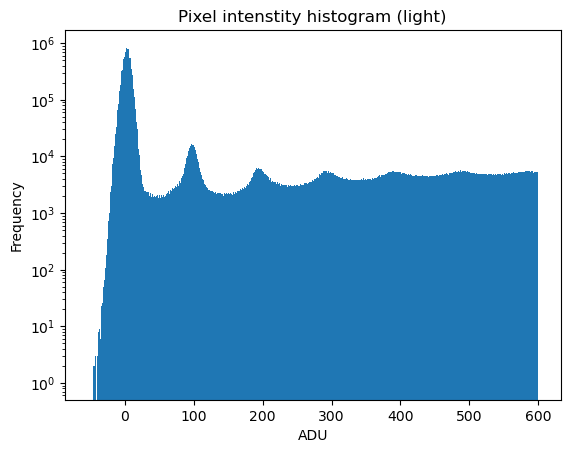

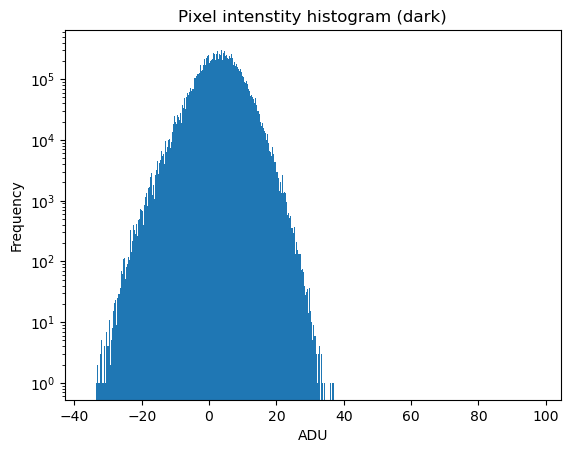

In [4]:
#Plot the histograms of the adu values. Peaks correspond to number of photons on the pixel.
#distribution of adu occors because of the energy spill over between pixels.

plt.figure()
h_light = plt.hist(frames_light[frames_light<600].ravel(), bins=3000)
plt.title('Pixel intenstity histogram (light)')
plt.ylabel('Frequency')
plt.xlabel('ADU')
plt.yscale('log')

plt.figure()
h_dark = plt.hist(frames_dark[frames_dark<600].ravel(), bins=3000)
plt.title('Pixel intenstity histogram (dark)')
plt.ylabel('Frequency')
plt.xlabel('ADU')
plt.yscale('log')



/home/software/opt/miniconda3/23.11.0/envs/jupyter/lib/python3.10/site-packages/scipy/signal/_peak_finding.py:678: RuntimeWarning: invalid value encountered in greater_equal
  keep &= (pmin <= peak_properties)


ADU at dark:	 3.6244820251464844


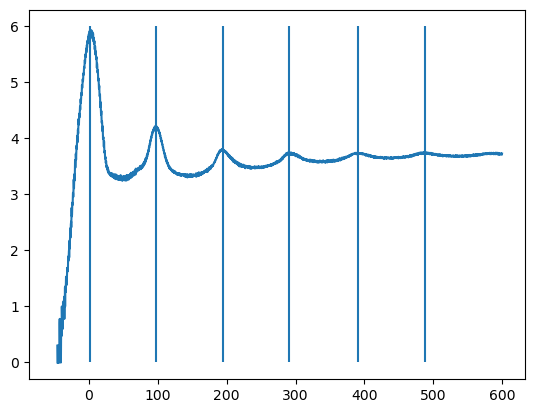

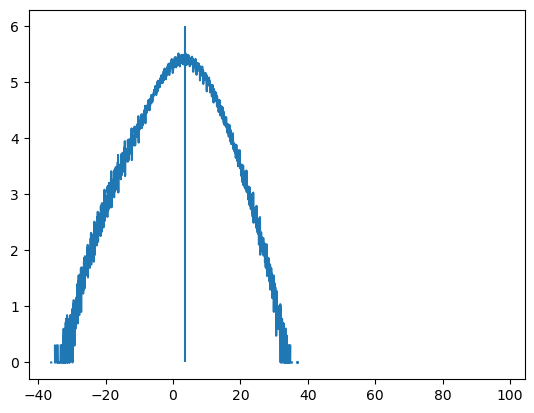

In [5]:
#Find the peak positions
f_light = np.log10(h_light[0])
peaks_light = scipy.signal.find_peaks(f_light, width=75)

f_dark = np.log10(h_dark[0])
f_dark_max_loc = np.where(f_dark==f_dark.max())


#plot the histogram values with the peak positions highlighted
plt.figure()
bins_light = h_light[1][:-1]
plt.plot(bins_light, f_light)
plt.vlines(bins_light[peaks_light[0]], ymin=0, ymax=6)

plt.figure()
bins_dark = h_dark[1][:-1]
plt.plot(bins_dark, f_dark)
#find the peak position

plt.vlines(bins_dark[f_dark_max_loc[0]], ymin=0, ymax=6)

#adu value corresponding to where 0 pixels should be.
dark_peak_adu = bins_dark[f_dark_max_loc[0]]


print('ADU at dark:\t', dark_peak_adu[0])

In [6]:
# selected the 5th peak (better statistics choosing furthest peak)
ph_peak = 5
# adu per photon. Subtract the 0 value from the dark, then divide by the peak number.
adu_ph = (bins_light[peaks_light[0]][ph_peak]-dark_peak_adu[0])/(ph_peak)

print('ADU/photon:\t', adu_ph)

ADU/photon:	 96.92149242960612


In [7]:
#### Note: In the constants.py file we use the 96.5 ADUs/photon.
# The purpose of this notebook is to demonstrate how to calcualte the ADUs/photon value.
# different dark runs and statisics may account for this minor descrepency.